# Assignement 2 - DSTI S19
## EXERCISE 1

### a. Revenue maximization.
K the objective function can be written as:  
$ K = \sum_{i=1}^3 D_i p_i$ = $\sum_{i=1}^3 p_i a_i exp(\frac{-p_i}{a_i})$
We also add the constraint that the number of people $D_i$ is equal to the number of seat in the plane: $\sum_{i=1}^3 D_i = 150$. 

We also have the constraints that $p_i > 0 $  

As this problem is a maximimisation problem for the objective function K, we will work on the equivalent problem of minisation of function -K = J. 

We will solve: 
Min J(p) =$ - \sum_{i=1}^3 p_i a_i exp(\frac{-p_i}{a_i})$  with p =(p1,p2,p3) 
With the constraints:  
F(p) = $\sum_{i=1}^3 a_i exp(\frac{-p_i}{a_i}) - 150 =0$  and $ - p_i \leq 0$  

### b. Problem resolution
We know that if u is a local minimum on the definition domain, and if the constraints are regular at point u (i.e. $F^{\prime}(u) \neq 0 $) there exist a Lagrange multiplier $\lambda$ such that (KKT conditions): 

$J^{\prime}(u) +\lambda F^{\prime}(u) = 0$

Gradient calculation:   
$\frac{\partial J}{\partial p_i} = -(a_i - p_i) exp(\frac{-p_i}{a_i}) = (p_i - a_i) exp(\frac{-p_i}{a_i})$

$\frac{\partial F}{\partial p_i} = - exp(\frac{-p_i}{a_i}) \neq 0 $

The KKT conditions and the constraints give the following equations:

$  \begin{cases}
    (p_i - a_i) exp(\frac{-p_i}{a_i}) - \lambda exp(\frac{-p_i}{a_i}) = 0 \\
    \sum_{i=1}^3 a_i exp(\frac{-p_i}{a_i}) - 150 = 0
  \end{cases}$

If we remove the case $\lambda = 0$ which is useless, we have:  

$  \begin{cases}
    p_i = a_i + \lambda \\
    \sum_{i=1}^3 a_i exp(\frac{-a_i-\lambda}{a_i}) - 150 = 0
  \end{cases}$
  
  The second equation is a non-linear scalar equation that we can solve using the Excel Solver for instance. We find $\lambda = 56.74$
  
Then we can deduce the $p_i^*$ :  
$  \begin{cases}
    p_1^* = 156.74 \\
    p_2^* = 206.74 \\
    p_3^* = 356.74
  \end{cases}$

And the constraints $p_i \geq 0$ are also verified 
From the value above, we can deduce the $D_i$ values: 

$  \begin{cases}
    D_1 = 21 \\
    D_2 = 38 \\
    D_3 = 91
  \end{cases}$

The value of J at this optimum point is: - 43 671. Therefore the maximum revenue is K = 43 671 $.

As we don't have information about the optimization domain, and the convexity of J, we must compute the hessian of J to try to deduce some information about his curvature. 

$ H_J =
 \begin{pmatrix}
  (2 -\frac{p_1}{a_1})  & 0 & 0 \\
  0 & (2 -\frac{p_2}{a_2}) & 0 \\
  0 & 0 & (2 -\frac{p_3}{a_3})
 \end{pmatrix}
 $   
 
 The hessian is a diagonal matrix, therefore the element on the diagonal are the eigenvalues. At the optimum point $p^*$ that we found we see that the eigenvalues $(2 -\frac{p_i^*}{a_i})$ are > 0. Therefore the hessian matrix is definite positive therefore the curvature of J is positive. Then we deduce that $p_i^*$ is a minimum. 
And by definition this point is a maximum for K (-J) then revenue function. 

### b. Sensitivity analysis

Let's call D the number of seats. We want to know the impact on the $p_i$ when D is replaced by $D + \Delta D$.
From the KKT equations, we have:   
$  \begin{cases}
    p_i = a_i + \lambda \\
    \sum_{i=1}^3 a_i exp(\frac{-a_i-\lambda}{a_i}) - D = 0
  \end{cases}$
  
From the second equation and from derivation we get: 
$\frac{\partial \lambda}{\partial D} = \frac{-1}{ \sum_{i=1}^3 a_i exp(\frac{-a_i-\lambda}{a_i})} $   
For $\lambda = 56.74$ we have $\frac{\partial \lambda}{\partial D} = -1.3071$  

Now using linear approximation $\Delta \lambda = \frac{\partial \lambda}{\partial D} \Delta D $ .  
Then $\Delta \lambda = -1.3071 * 3 = -3.9213 $

From the first KKT equation we have $\frac{\partial p_i}{\partial \lambda} = 1 $  
$\frac{\partial p}{\partial \lambda} =  \begin{pmatrix}
  1 \\
  1 \\
  1  \\
 \end{pmatrix} $  
 
 And $\Delta p = \Delta \lambda \frac{\partial p}{\partial \lambda} = -3.92 * \begin{pmatrix}
  1 \\
  1 \\
  1  \\
 \end{pmatrix} $   
 
Therefore:  
$p_1$ = 152.82  
$p_2$ = 202.82   
$p_3$ = 352.82 

The optimal revenue is $K^* = 43 837$ $

  






## Exercise 2 - Mimimization with gradient algorithms
### Rosenbrock function
  
The problem is to minimize the function f(x) summarized below:  
Min $f(x) = 100{(x_2 - {x_1}^2)}^2 + {(1 - x_1)}^2$  



In [9]:
import numpy as np 
from scipy import optimize
import matplotlib.pyplot as plt  # to plot
import matplotlib as mpl
import seaborn as sns
import math
import time
from random import uniform
sns.set(context="talk", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.05)

FIGSIZE = (15, 8)  #: Figure size, in inches!
mpl.rcParams['figure.figsize'] = FIGSIZE

In [3]:
Nfeval = 1
xh=[]
yh=[]
fobj = None
def callbackF(Xi):
    global Nfeval
    global xh
    global yh
    global fobj
    xh.append(Nfeval)
    yh.append(fobj(Xi))
#    print ('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f} '.format(Nfeval, Xi[0], Xi[1], fobj(Xi)))
#    print ('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f} {4: 3.6f} {5: 3.6f} {6: 3.6f} {7: 3.6f} {8: 3.6f}'\
#        .format(Nfeval, Xi[0], Xi[1],Xi[2], Xi[3], Xi[4], Xi[5],Xi[6], fobj(Xi)))
    Nfeval += 1

In [4]:
def rosen(x):   # The rosenbrock function
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

In [5]:
def jrosen(x):
    return np.array((-200 *(x[1] - x[0]**2) *2*x[0] -2 * (1-x[0]),
                     200 * (x[1] - x[0]**2)))


In [6]:
def Egg(x): # The Eggcrate Function 
    return x[0]**2 + x[1]**2 + 25 * (math.sin(x[0])**2 + math.sin(x[1])**2)


In [7]:
def jEgg(x): # The Eggcrate Function 
    return np.array((2 * x[0]  + 50 * math.sin(x[0])* math.cos(x[0]),
                    2 * x[1]  + 50 * math.sin(x[1])* math.cos(x[1])))

In [8]:
def Golinski(x):
    return 0.7854*x[0]*x[1]**2 * (3.3333 * x[2]**2 + 14.9334*x[2] - 43.0934) \
           - 1.5079 * x[0]*(x[5]**2 + x[6]**2) + 7.477*(x[5]**3 + x[6]**3) + 0.7854 * (x[3]*x[5]**2 + x[4]*x[6]**2)


In [9]:
def jGolinski(x):
    dfdx0 = 0.7854 * x[1]**2 * (3.3333* x[2]**2 + 14.9334*x[2]-43.0934) - 1.5079*(x[5]**2 + x[6]**2)
    dfdx1 = 2*0.7854 * x[0] * x[1]* (3.3333* x[2]**2 + 14.9334*x[2]-43.0934)
    dfdx2 = 0.7854 * x[0]*x[1]**2 * (2 * 3.3333 * x[2] + 14.9334 )
    dfdx3 = 0.7854 * x[5]**2
    dfdx4 = 0.7854 * x[6]**2
    dfdx5 = -2*1.5079 * x[0]*x[5] + 3*7.477 * x[5]**2 + 2 * 0.7854*x[3]*x[5]
    dfdx6 = -2*1.5079 * x[0]*x[6] + 3*7.477 * x[6]**2 + 2* 0.7854*x[4]*x[6]
    return np.array([dfdx0, dfdx1,dfdx2, dfdx3, dfdx4,dfdx5,dfdx6])

In [10]:
cons = ({'type': 'ineq', 'fun': lambda x: -27/(x[0] * x[1]**2 *x[2])+ 1},
        {'type': 'ineq', 'fun': lambda x: -397.5/(x[0] * x[1]**2 *x[2]**2)+ 1},
        {'type': 'ineq', 'fun': lambda x: -1.93*x[3]**3/(x[1] * x[2] *x[5]**4)+ 1},
        {'type': 'ineq', 'fun': lambda x: -1.93*x[4]**3/(x[1] * x[2] *x[6]**4)+ 1},
        {'type': 'ineq', 'fun': lambda x: -math.sqrt((745*x[3]/(x[1]*x[2]))**2 + 16.9e6)/(110.0 * x[5]**3) +1 },
        {'type': 'ineq', 'fun': lambda x: -math.sqrt((745*x[4]/(x[1]*x[2]))**2 + 157.5e6)/(85.0 * x[6]**3) +1},
        {'type': 'ineq', 'fun': lambda x: -x[1]*x[2]/40 + 1},
        {'type': 'ineq', 'fun': lambda x: -5 * x[1]/x[0]+ 1},
        {'type': 'ineq', 'fun': lambda x: -x[0]/(12 * x[1])+ 1},
        {'type': 'ineq', 'fun': lambda x: -(1.5 * x[5] + 1.9)/x[3]+ 1},
        {'type': 'ineq', 'fun': lambda x: -(1.1 * x[6] + 1.9)/x[4]+ 1}) 
bnds = ((2.6, 3.6), (0.7, 0.8), (17, 28), (7.3, 8.3), (7.3, 8.3), (2.9, 3.9),(5.0, 5.9))

In [11]:
def myMinimize(f,jf=None, title='', mthd='BFGS', cons=None, bnds=None):
    global Nfeval
    global xh
    global yh
    global fobj
    print(f"Run Id \t Starting Point (x0) \t End Point (Optimal) \t Optimal Objective function \t Convergence ? \t Execution Time\n")
    
    for i in range(10):
       #x0 = uniform(-xb,xb)
       #xz = [x0 for i in range(sz)]
       if f == Golinski : 
          lbnds = list(bnds)
          xz = [uniform(xl,xu) for (xl,xu) in lbnds]
          xh = [0]
          yh = [f(xz)]
       elif f == rosen :
           x0 = uniform(-5, 5)
           xz = [x0, x0]
       elif f == Egg :
           x0 = uniform(- 8 * math.atan(1), 8 * math.atan(1))
           xz = [x0, x0]
       fobj = f
#       print (f" f(x0) = {yh[0]}")
       start = time.time()
       oResult = optimize.minimize(f,
                                   xz,
                                   method=mthd,
                                   jac=jf,
                                   bounds=bnds,
                                   constraints=cons,
                                   callback=callbackF)

#       myLabel = f"run {i} - x0=[{x0:.2f},{x0:.2f}]"
#       print(oResult)
       end = time.time()
       time_taken = end - start
       myLabel = f"run {i}"
       plt.plot(xh,yh, label=myLabel)
       plt.title(title)
       plt.xlabel("Iterations")
       plt.ylabel("Objective function")
       plt.legend()
#       np.set_printoptions(precision=6, floatmode='fixed', suppress=True)
       np.set_printoptions(formatter={'float': '{: 0.6f}'.format})
#       print(f"{i}\t\t [{x0:9.06f} {x0:9.06f}] \t {oResult.x} \t\t {oResult.fun:9.06f}\t\t\t{oResult.success} ")
       print(f"{i}\t{np.array(xz)} \t {oResult.x} \t\t {oResult.fun:9.06f}\t\t\t{oResult.success}\t{time_taken:.06} ")
#       print(f"xh = {xh}")
#       print(f"yh = {yh}")

       Nfeval=1
       xh=[]
       yh=[]
    plt.show()


Run Id 	 Starting Point (x0) 	 End Point (Optimal) 	 Optimal Objective function 	 Convergence ? 	 Execution Time

0	[ 1.495148  1.495148] 	 [ 1.000000  1.000000] 		  0.000000			True	0.00199008 
1	[-1.928561 -1.928561] 	 [ 1.000000  1.000000] 		  0.000000			True	0.00402021 
2	[ 3.260959  3.260959] 	 [ 0.999999  0.999999] 		  0.000000			True	0.00299335 
3	[ 0.665751  0.665751] 	 [ 1.000000  1.000000] 		  0.000000			True	0.000997305 
4	[ 4.329719  4.329719] 	 [ 1.000000  1.000000] 		  0.000000			True	0.00398874 
5	[-2.919833 -2.919833] 	 [ 1.000000  1.000000] 		  0.000000			True	0.00497746 
6	[-1.718609 -1.718609] 	 [ 1.000000  1.000000] 		  0.000000			True	0.00299263 
7	[-3.711911 -3.711911] 	 [ 1.000000  1.000000] 		  0.000000			True	0.00498676 
8	[ 2.922647  2.922647] 	 [ 1.000000  1.000000] 		  0.000000			True	0.00396538 
9	[-4.103234 -4.103234] 	 [ 1.000000  1.000000] 		  0.000000			True	0.00498796 


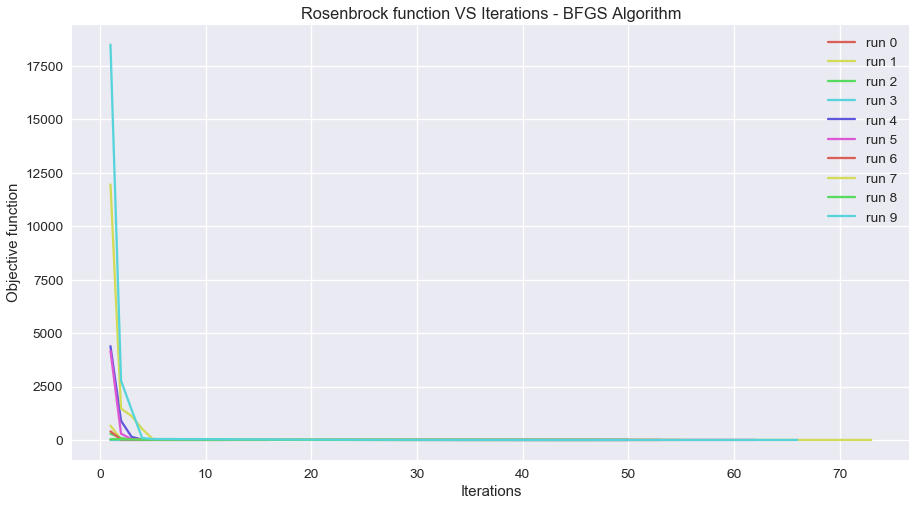

In [37]:
myMinimize(rosen, jrosen,"Rosenbrock function VS Iterations - BFGS Algorithm")

### Results analysis

We use the scipy gradient minimization algorithm BFGS to solve the problem. In the experiment above we ran the resolution 10 times. We see that the BFGS algorithm always converge. And convergence is fast in terms of iteration (less than 70 iterations) and CPU time (a few ms on a I7 Intel CPU) . The solution is always feasible. 


### Eggcrate function
Min $f(x) = {x_1}^2 + {x_2}^2 + 25 ( {\sin x_1}^2 + {\sin x_2}^2 )$  


Run Id 	 Starting Point (x0) 	 End Point (Optimal) 	 Optimal Objective function 	 Convergence ? 	 Execution Time

0	[-3.700528 -3.700528] 	 [-3.019602 -3.019602] 		 18.976395			True	0.000997543 
1	[-0.448977 -0.448977] 	 [-0.000000 -0.000000] 		  0.000000			True	0.0 
2	[-0.786229 -0.786229] 	 [ 0.000000  0.000000] 		  0.000000			True	0.0 
3	[-4.780395 -4.780395] 	 [ 0.000000  0.000000] 		  0.000000			True	0.000997543 
4	[-3.502700 -3.502700] 	 [-3.019602 -3.019602] 		 18.976395			True	0.0 
5	[ 2.612261  2.612261] 	 [ 3.019602  3.019602] 		 18.976395			True	0.0 
6	[-3.174501 -3.174501] 	 [-3.019602 -3.019602] 		 18.976395			True	0.0 
7	[ 0.799578  0.799578] 	 [-0.000000 -0.000000] 		  0.000000			True	0.0 
8	[-4.354468 -4.354468] 	 [ 3.019602  3.019602] 		 18.976395			True	0.0 
9	[ 4.568601  4.568601] 	 [-3.019602 -3.019602] 		 18.976395			True	0.00100803 


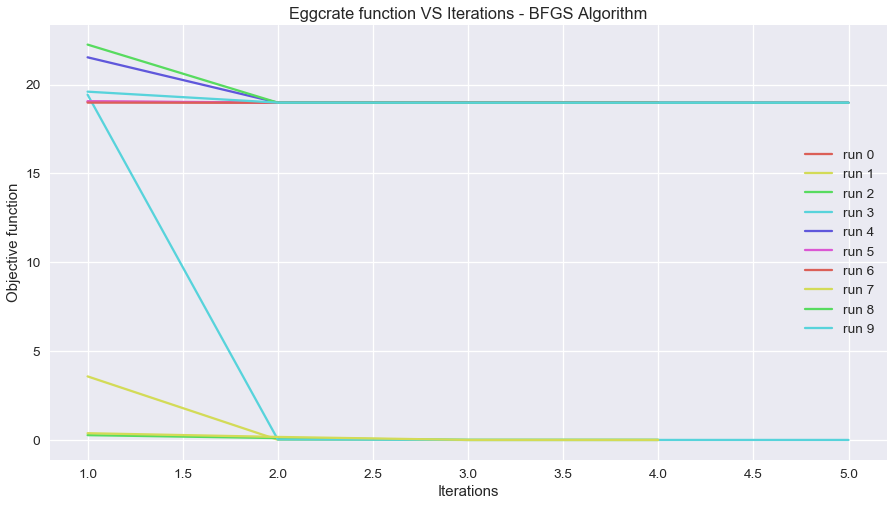

In [38]:
myMinimize(Egg,jEgg,title="Eggcrate function VS Iterations - BFGS Algorithm")

### Results analysis

We also use the BFGS scipy minimization algorithm. We see that the algoritm always converge, but not always toward the global minimum which is (0,0) for this function. 60 % of the time in the above experiment with 10 runs, the algorithm converge toward a local minimum (3.019602,3.019602) or (-3.019602,-3.019602) (as the function is symmetric). And the algorithm get trapped in the local minimum. However the convergence is very fast (less than 5 iterations). And the CPU time is also very small (less than or equal 1 ms). 


### Golinski's Speed Reducer
Min $f(x) = 0.7854 x_1 {x_2}^2 ( 3.3333{x_3}^2 + 14.9334 x_3 - 43.0934)  $ 
 $- 1.5079 x_1 ( {x_6}^2 + {x_7}^2) + 7.477({x_6}^3+{x_7}^3) $
 $+ 0.7854(x_4{x_6}^2+ x_5{x_7)}^2)$   

With the constraints:   
<img src="PDFXEdit_JlCoCCfymf.png" width="400">

And the bounds below: 
<img src="PDFXEdit_MUj7Nlrybs.png" width="200">






Run Id 	 Starting Point (x0) 	 End Point (Optimal) 	 Optimal Objective function 	 Convergence ? 	 Execution Time

0	[ 3.200685  0.775416  19.479473  7.366216  7.496399  3.881249  5.781678] 	 [ 3.499999  0.700000  17.000000  7.300000  7.715320  3.350214  5.286654] 		 2994.354148			False	0.0 
1	[ 2.868103  0.706221  25.859653  7.752938  7.563872  3.351859  5.742376] 	 [ 3.500000  0.700000  17.000000  7.300000  7.715320  3.350215  5.286654] 		 2994.354789			False	0.0 
2	[ 2.963067  0.739014  21.724564  7.863609  7.747151  3.269913  5.741222] 	 [ 3.500000  0.700000  17.000000  7.300000  7.715320  3.350215  5.286654] 		 2994.354780			True	0.0156207 
3	[ 3.479901  0.735556  26.524942  7.851407  7.333724  3.066005  5.366822] 	 [ 3.500000  0.700000  17.000000  7.300000  7.715319  3.350214  5.286654] 		 2994.354768			True	0.0 
4	[ 2.804744  0.784056  23.453868  7.358154  7.524664  3.434333  5.632457] 	 [ 3.500000  0.700000  17.000000  7.300000  7.715320  3.350214  5.286654] 		 2994.354608			Fal

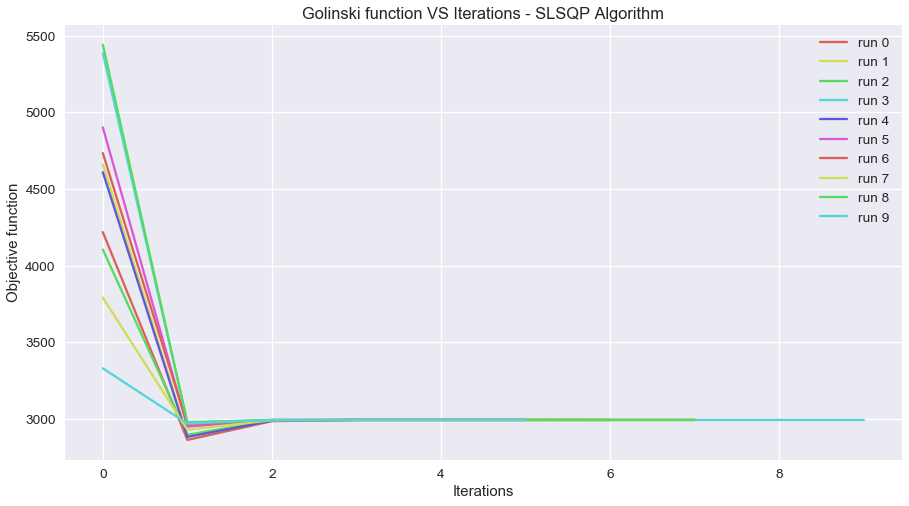

In [13]:
myMinimize(Golinski,jGolinski,title="Golinski function VS Iterations - SLSQP Algorithm",
           mthd="SLSQP", cons=cons, bnds=bnds)

### Results analysis
For the minimization, we use the scipy gradient algorithm SLSQP. We no longer can use the BFGS algorithm as this problem introduce inequalities constraints that the BFGS algorithm cannot handle. The experiement with 10 run above shows that the algorithm always converge to the expected minimum (3.499999, 0.700000, 17.000000, 7.300000, 7.715320, 3.350214,5.286654). However the algorithm itself has some trouble to identify that the convergence is reached, as the convergence flag is to false whareas we see that the minimum has been reached. The convergence is fast as it's reached in less that 10 iterations. And it takes less that 15 ms to run. The results are all feasible. 

## Exercise 3 - Minimization with heuristic algorithms
For this exercise, we will use the same genetic algorithm (NSGAII algorithm included in the JMetalPy framework) for the 3 problems.

### Rosenbrock function
 

In [2]:
from jmetal.algorithm.multiobjective.nsgaii import NSGAII
from jmetal.operator import SBXCrossover, PolynomialMutation, BinaryTournamentSelection
from jmetal.problem.singleobjective.unconstrained import Rastrigin
from jmetal.util.comparator import RankingAndCrowdingDistanceComparator, DominanceComparator
from jmetal.util.observer import PrintObjectivesObserver
from jmetal.util.solution_list import print_function_values_to_file, print_variables_to_file
from jmetal.util.termination_criterion import StoppingByEvaluations

from jmetal.core.problem import BinaryProblem, FloatProblem
from jmetal.core.solution import BinarySolution, FloatSolution

from jmetal.core.observable import Observer
import logging

In [14]:
LOGGER = logging.getLogger('jmetal')
class Rosen(FloatProblem):

    def __init__(self, number_of_variables: int = 2):
        super(Rosen, self).__init__()
        self.number_of_objectives = 1
        self.number_of_variables = number_of_variables
        self.number_of_constraints = 0

        self.obj_directions = [self.MINIMIZE]
        self.obj_labels = ['f(x)']

        self.lower_bound = [-5 for _ in range(number_of_variables)]
        self.upper_bound = [5 for _ in range(number_of_variables)]

        FloatSolution.lower_bound = self.lower_bound
        FloatSolution.upper_bound = self.upper_bound

    def evaluate(self, solution: FloatSolution) -> FloatSolution:
        x = solution.variables

#        for i in range(solution.number_of_variables):
#            result += x[i] * x[i] - a * math.cos(2 * math.pi * x[i])
        result = 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2


        solution.objectives[0] = result

        return solution

    def get_name(self) -> str:
        return 'Rosenbrock'


In [4]:
class DataObjectivesObserver(Observer):

    def __init__(self, frequency: float = 1.0) -> None:
        """ Show the number of evaluations, best fitness and computing time.
        :param frequency: Display frequency. """
        self.display_frequency = frequency
        self.istore=0
        self.eval = []
        self.x = []
        self.obj = []
    def update(self, *args, **kwargs):
        evaluations = kwargs['EVALUATIONS']
        solutions = kwargs['SOLUTIONS']
        self.istore +=1

        if (evaluations % self.display_frequency) == 0 and solutions:
            if type(solutions) == list:
                fitness = solutions[0].objectives
                variables = solutions[0].variables
                fsb = solutions[0].is_feasible()
            else:
                fitness = solutions.objectives
                variables = solutions.variables
                fsb = solutions.is_feasible()

            self.eval.append(evaluations)
            self.x.append(variables)
            self.obj.append(fitness)
            
    def get_data(self) -> (list, list, list):
        return (self.eval, self.x, self.obj)


In [12]:
def myAlgorithm(problem):
    max_evaluations = 15000
    algorithm = NSGAII(
                problem=problem,
                population_size=70,
                offspring_population_size=70,
                mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables, distribution_index=20.0),
                crossover=SBXCrossover(probability=0.9, distribution_index=20.0),
                selection=BinaryTournamentSelection(comparator=RankingAndCrowdingDistanceComparator()),
                termination_criterion=StoppingByEvaluations(max=max_evaluations),
                dominance_comparator=DominanceComparator()
                 )
    print(f"Run Id \tEnd Point(Optimal) \t Objective function \t Feasible?  \t Execution Time\n")
    np.set_printoptions(formatter={'float': '{: 0.6f}'.format})
    res=[]
    obj=[]
    for i in range(10):

        obs = DataObjectivesObserver(100)
        #algorithm.observable.register(observer=PrintObjectivesObserver(1000))
        algorithm.observable.register(observer=obs)
        algorithm.run()
        result = algorithm.get_result()
        (ev,x,fx) = obs.get_data()
        res.append(result[0].variables)
        obj.append(result[0].objectives)
        # Save results to file
        #print_function_values_to_file(result, 'FUN.'+str(i)+'.'+ algorithm.get_name()+"-"+problem.get_name())
        #print_variables_to_file(result, 'VAR.' +str(i)+'.'+ algorithm.get_name()+"-"+problem.get_name())
        fsb = result[0].is_feasible()
        print(f"{i} \t {np.array(result[0].variables)}\t {np.array(result[0].objectives)}\t\t {fsb}\
              {float(algorithm.total_computing_time):0.6f}")
        myLabel = f"Run - {i}"
        plt.plot(ev,fx, label=myLabel)
        plt.title("Genetic Algorithm NSGAII - "+ problem.get_name())
            #plt.title("Genetic Algorithm - Eggcrate function")
        #plt.title("Genetic Algorithm - Golinski function")
        plt.xlabel("Evaluations")
        plt.ylabel("Objective function")
        plt.legend()
    print(f"\nAverage variables: {np.average(res,axis=0)} \t Average objectives: {np.average(obj):0.6f}\n")
    print(f"STD variables: {np.std(res,axis=0)} \t STD objectives: {np.std(obj):0.6f}\n")        
    plt.show()

Run Id 	End Point(Optimal) 	 Objective function 	 Feasible?  	 Execution Time

0 	 [ 0.971233  0.943071]	 [ 0.000832]		 True              2.799529
1 	 [ 1.012983  1.026174]	 [ 0.000169]		 True              2.804516
2 	 [ 0.999794  0.999542]	 [ 0.000000]		 True              2.797514
3 	 [ 1.021031  1.042652]	 [ 0.000444]		 True              2.779562
4 	 [ 1.028052  1.056877]	 [ 0.000787]		 True              2.836464
5 	 [ 1.010331  1.020782]	 [ 0.000107]		 True              2.951124
6 	 [ 0.995364  0.990872]	 [ 0.000023]		 True              2.790534
7 	 [ 1.006284  1.012636]	 [ 0.000040]		 True              2.827456
8 	 [ 1.016640  1.033658]	 [ 0.000278]		 True              2.788520
9 	 [ 1.027322  1.055533]	 [ 0.000749]		 True              2.830449

Average variables: [ 1.008903  1.018180] 	 Average objectives: 0.000343

STD variables: [ 0.016198  0.032507] 	 STD objectives: 0.000318



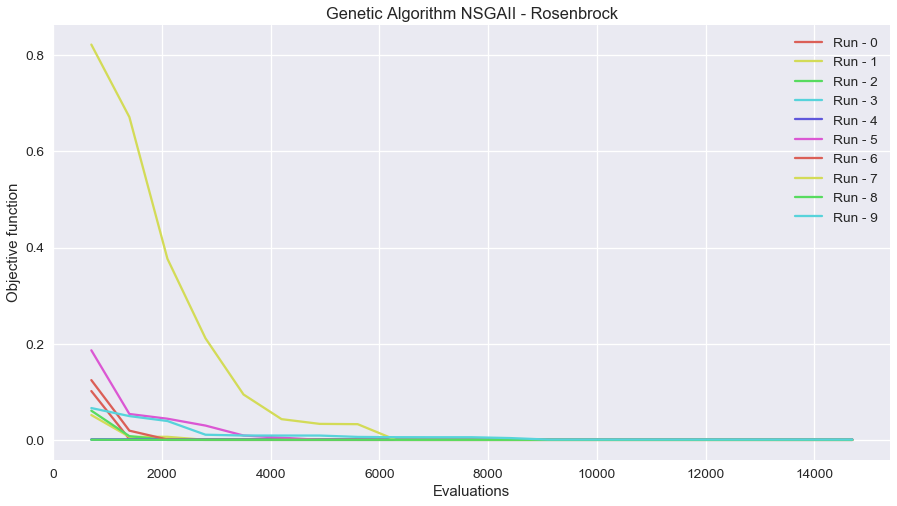

In [15]:
problem = Rosen(2)
myAlgorithm(problem)



### Rosenbrock Results analysis
We use the NSGAII algorithm included in the JMetalPy library with the following parameters: 
 Max_Evalutions=15000     
 population_size=70  
 offspring_population_size=70  
 crossover: probability=0.9  

We see that the algorithm starts to converge quickly toward the global minimum. However, the results are not as accurate as the results we get with the gradient based algorithms. The algorithm requires much more evaluations (reach the max evaluation of 15000 without giving very accurate results).   
The CPU time is also higher: it takes now up to 2.9 s for a single run compared to ms for the gradient algorithms. 
All the solutions, verifies the constraints and are then feasible. 



In [16]:
class Egg(FloatProblem):

    def __init__(self, number_of_variables: int = 2):
        super(Egg, self).__init__()
        self.number_of_objectives = 1
        self.number_of_variables = number_of_variables
        self.number_of_constraints = 0

        self.obj_directions = [self.MINIMIZE]
        self.obj_labels = ['f(x)']

        self.lower_bound = [-5 for _ in range(number_of_variables)]
        self.upper_bound = [5 for _ in range(number_of_variables)]

        FloatSolution.lower_bound = self.lower_bound
        FloatSolution.upper_bound = self.upper_bound

    def evaluate(self, solution: FloatSolution) -> FloatSolution:
        x = solution.variables

#        for i in range(solution.number_of_variables):
#            result += x[i] * x[i] - a * math.cos(2 * math.pi * x[i])
        result = x[0]**2 + x[1]**2 + 25 * (math.sin(x[0])**2 + math.sin(x[1])**2)


        solution.objectives[0] = result

        return solution

    def get_name(self) -> str:
        return 'Eggcrate'



Run Id 	End Point(Optimal) 	 Objective function 	 Feasible?  	 Execution Time

0 	 [ 0.000552 -0.000000]	 [ 0.000008]		 True              3.478726
1 	 [ 0.000093 -0.000117]	 [ 0.000001]		 True              3.178494
2 	 [ 0.000482 -0.000085]	 [ 0.000006]		 True              2.979991
3 	 [-0.000010  0.000069]	 [ 0.000000]		 True              3.044888
4 	 [-0.000029  0.000225]	 [ 0.000001]		 True              2.867349
5 	 [ 0.000388  0.000053]	 [ 0.000004]		 True              4.093049
6 	 [ 0.000181  0.000028]	 [ 0.000001]		 True              3.129647
7 	 [-0.000045  0.000011]	 [ 0.000000]		 True              3.035846
8 	 [ 0.000022 -0.000231]	 [ 0.000001]		 True              2.798532
9 	 [ 0.000343 -0.000272]	 [ 0.000005]		 True              2.871423

Average variables: [ 0.000198 -0.000032] 	 Average objectives: 0.000003

STD variables: [ 0.000214  0.000141] 	 STD objectives: 0.000003



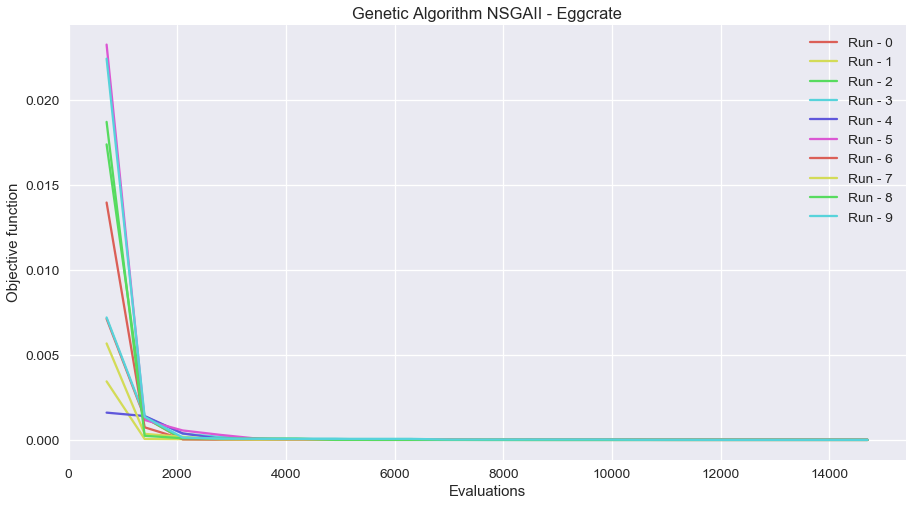

In [17]:
problem = Egg(2)
myAlgorithm(problem)

### Eggcrate Results analysis
We use the same parameter as with the Rosenbrock function. This time the algorithm doesn't get trapped in a local minimum as with the gradient algorithm. However the results are not as accurate: After 10000 evaluations, the results found are about $({10}^{-4},{10}^{-4})$ for the expected (0,0). The CPU time for a single run is 3 s. 



In [18]:
class Golinski(FloatProblem):

    def __init__(self, number_of_variables: int = 7):
        super(Golinski, self).__init__()
        self.number_of_objectives = 1
        self.number_of_variables = number_of_variables
        self.number_of_constraints = 11

        self.obj_directions = [self.MINIMIZE]
        self.obj_labels = ['f(x)']

        self.lower_bound = [2.6, 0.7, 17.0, 7.3, 7.3, 2.9, 5.0]
        self.upper_bound = [3.6, 0.8, 28.0, 8.3, 8.3, 3.9, 5.9]

 #       self.lower_bound = [-5 for _ in range(number_of_variables)]
 #       self.upper_bound = [5 for _ in range(number_of_variables)]

        FloatSolution.lower_bound = self.lower_bound
        FloatSolution.upper_bound = self.upper_bound

    def evaluate(self, solution: FloatSolution) -> FloatSolution:
#        a = 10.0
#        result = a * solution.number_of_variables
        x = solution.variables

#        for i in range(solution.number_of_variables):
#            result += x[i] * x[i] - a * math.cos(2 * math.pi * x[i])
        result = 0.7854*x[0]*x[1]**2 * (3.3333 * x[2]**2 + 14.9334*x[2] - 43.0934) \
                 - 1.5079 * x[0]*(x[5]**2 + x[6]**2) + 7.477*(x[5]**3 + x[6]**3) + 0.7854 * (x[3]*x[5]**2 + x[4]*x[6]**2)

        solution.objectives[0] = result
        self.__evaluate_constraints(solution)             
        return solution

    def get_name(self) -> str:
        return 'Golinski'

    def __evaluate_constraints(self, solution: FloatSolution) -> None:
        constraints = [0.0 for _ in range(self.number_of_constraints)]

        x = solution.variables

        constraints[0] = -27/(x[0] * x[1]**2 *x[2]) + 1
        constraints[1] = -397.5/(x[0] * x[1]**2 *x[2]**2) + 1
        constraints[2] = -1.93*x[3]**3/(x[1] * x[2] *x[5]**4)+ 1
        constraints[3] = -1.93*x[4]**3/(x[1] * x[2] *x[6]**4)+ 1
        constraints[4] = -math.sqrt((745*x[3]/(x[1]*x[2]))**2 + 16.9e6)/(110.0 * x[5]**3) +1
        constraints[5] = -math.sqrt((745*x[4]/(x[1]*x[2]))**2 + 157.5e6)/(85.0 * x[6]**3) +1
        constraints[6] = -x[1]*x[2]/40 + 1
        constraints[7] = -5 * x[1]/x[0]+ 1 
        constraints[8] = -x[0]/(12 * x[1])+ 1
        constraints[9] = -(1.5 * x[5] + 1.9)/x[3]+ 1
        constraints[10] = -(1.1 * x[6] + 1.9)/x[4]+ 1

        overall_constraint_violation = 0.0
        number_of_violated_constraints = 0.0

        for constrain in constraints:
            if constrain < 0.0:
                overall_constraint_violation += constrain
                number_of_violated_constraints += 1

        solution.attributes['overall_constraint_violation'] = overall_constraint_violation
        solution.attributes['number_of_violated_constraints'] = number_of_violated_constraints



Run Id 	End Point(Optimal) 	 Objective function 	 Feasible?  	 Execution Time

0 	 [ 3.500027  0.700000  17.000000  7.300000  7.715608  3.350328  5.286854]	 [ 2994.527174]		 True              3.698158
1 	 [ 3.500092  0.700000  17.000000  7.300000  7.715840  3.350217  5.286976]	 [ 2994.607263]		 True              3.782882
2 	 [ 3.500018  0.700000  17.000000  7.300000  7.715887  3.350485  5.286655]	 [ 2994.444163]		 True              3.691159
3 	 [ 3.500020  0.700000  17.000000  7.300000  7.715408  3.350230  5.286657]	 [ 2994.370508]		 True              3.690126
4 	 [ 3.500434  0.700000  17.000000  7.300000  7.715717  3.350233  5.286745]	 [ 2994.596415]		 True              3.647242
5 	 [ 3.500043  0.700000  17.000000  7.300000  7.715774  3.350418  5.286678]	 [ 2994.448326]		 True              3.661208
6 	 [ 3.500016  0.700000  17.000000  7.300000  7.715550  3.350230  5.286758]	 [ 2994.435919]		 True              3.691119
7 	 [ 3.500050  0.700000  17.000000  7.300000  7.715372  3.350248  

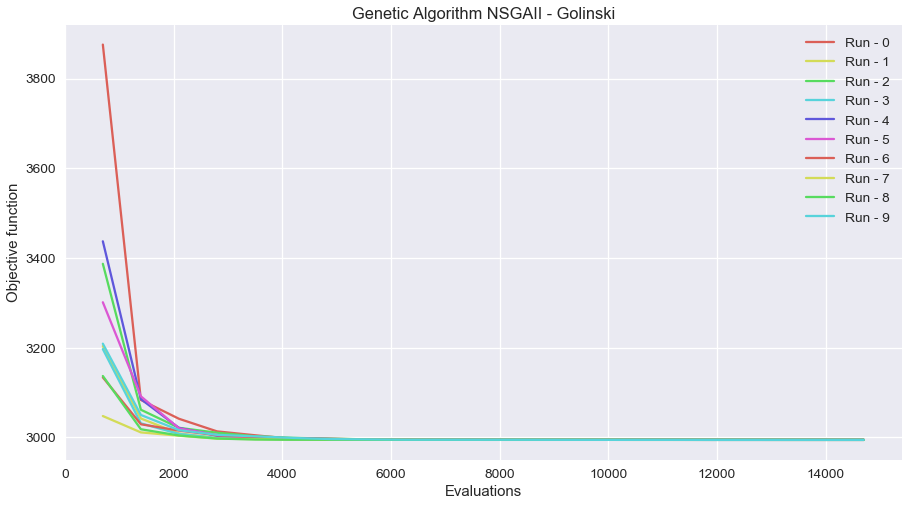

In [19]:
problem = Golinski(7)
myAlgorithm(problem)

### Golinski Results Analysis 
We use the same algorithm and the same parameters as before. We see again that the algrithm converge toward the expected minimum. We only have 4 digits precision after the decimal point. CPU time is now up to 4 s by run.





### Genetic algorithm tunning
We first tried to run the simplest Genetic Algorithm included in JMetalPy framework. This algorithm was working well for the first 2 problem but not for the third one (Golinski). After some searching, we found that the implementation of this algorithm in the JMetalPy framework was not handling constraints. That's why this algorithm was not working with the Golinski problem that has 11 constraints. 
That's why the algorithm NSGAII has been choosen. Although this algorithm has been designed for multi-objectives problem, the implementation in JMetalPy can be used for single objectives minimization problems. 

In the framework examples the population is usually set to 100. 
We did some sensitivity test runs and noticed that a population of 70 was a good intermediate value (We tested from 20 to 100).  
We also carried out tests on crossover value. We noticed that the value of 0.9 was working for the 3 problems. 






### Comparison of the algorithms - Dependence on initial design vector

| Problem name  | Gradient based Algorithm                             | Genetic Algorithm              |
| ------------- |:----------------------------------------------------:|--------------------------------|
| Rosenbrock    | Low: optimal convergence whatever the starting point | Low                            |
| Eggcrate      | High                                                 | Low                            |
| Golinski      | Low                                                  | Low                            |



### Comparison of the algorithms - Computational effort

| Problem name  | Gradient based Algorithm                             | Genetic Algorithm              |
| ------------- |:----------------------------------------------------:|--------------------------------|
| Rosenbrock    | 0.05 s                                               | 2.95 s                         |
| Eggcrate      | 0.01 s                                               | 4.09 s                         |
| Golinski      | 0.015 s                                              | 4.14 s                         |


### Comparison of the algorithms - Convergence history

| Problem name  | Gradient based Algorithm                             | Genetic Algorithm                                     |
| ------------- |:----------------------------------------------------:|-------------------------------------------------------|
| Rosenbrock    | Always converged to the global minimum               | Converged to global minimum but depend on tuning      |
| Eggcrate      | Always converged to local or global minimum          | Converged to global minimum but depend on tuning      |
| Golinski      | Always converged to the global minimum               | Converged to global minimum but depend on tuning      |


### Comparison of the algorithms - Frequency to get trapped in a local minimum

| Problem name  | Gradient based Algorithm                             | Genetic Algorithm              |
| ------------- |:----------------------------------------------------:|--------------------------------|
| Rosenbrock    | 0                                                    | 0                              |
| Eggcrate      | 60%                                                  | 0                              |
| Golinski      | 0                                                    | 0                              |


### Conclusion
* Gradient based optimization algorithm can get stuck in local minima. They also depends on starting point. If the starting point is close to a local minima, the algorithm will get stuck to the local minima. But if the starting point is close to the global minima, it will converge to the global minima. We saw evidence of this with the Eggcrate function. 
* Genetic Algorithms require more computational effort. And we need to spend time to tune them (find the population size, the crossover coefficient, ...)
* It's more challenging to get accurate results with the genetic algorithm, as it converge very slowly to the global minima. 